# Something very helpful 😉

## Plotly
- You can visit this website more information:
https://plotly.com/python/

In [ ]:
# Install plotly to your activated environment
!pip install -q plotly
!pip install --upgrade nbformat

# Note: after install above libraries you have to restart kernel to make effect.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
restaurant = pd.read_csv('data\\restaurant.csv')
restaurant.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Barchart

In [11]:
import plotly.express as px

dfplot = restaurant.groupby('day')['tip'].mean().reset_index()

fig = px.bar(dfplot, x='day', y='tip', title= 'Mean of tip over days')
fig.show()

In [4]:
import plotly.express as px

dfplot = restaurant.groupby(['day','sex'])['tip'].mean().reset_index()

fig = px.bar(dfplot, x='day', y='tip', color= 'sex', barmode = 'group', title= 'Mean of tip over days by sex')
fig.show()

### Piechart

In [5]:
import plotly.express as px

fig = px.pie(restaurant, values='tip', names='day')
fig.show()

### Sunburst chart

In [6]:
import plotly.express as px

fig = px.sunburst(restaurant, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

## SweetViz

A pandas-based library to visualize, compare datasets and summary your dataset

https://pypi.org/project/sweetviz/


In [7]:
# Install libary for the first using:
!pip install -q sweetviz

In [12]:
titanic = pd.read_csv('data\\titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Summary your dataset:
import sweetviz as sv

my_report = sv.analyze(titanic)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Cohort Retention Analysis

In [13]:
trans = pd.read_csv('data\\transaction.csv')

trans['transaction_date'] = pd.to_datetime(trans['transaction_date'])
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [14]:
# Get the first make purchase date of each customer:
cus_first_date = trans.groupby('customer_id')['transaction_date'].min().reset_index()
cus_first_date.rename(columns={'transaction_date': 'first_trans_date'}, inplace=True)
# cus_first_date.head()

,customer_id,first_trans_date
0,1,2017-01-05
1,2,2017-05-04
2,3,2017-02-23
3,4,2017-04-03
4,5,2017-03-03


In [15]:
# Using cus_first_date and merge to transaction data:
trans = pd.merge(
    left = trans,
    right = cus_first_date,
    how = 'left',
    on = 'customer_id'
)

In [17]:
# Extract year-month(or week number or quater or whatever you want...) from transaction date:

trans['trans_year_month'] = trans['transaction_date'].dt.to_period('M')
trans['first_trans_year_month'] = trans['first_trans_date'].dt.to_period('M')
# trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_trans_date,trans_year_month,first_trans_year_month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017-02,2017-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-01-20,2017-05,2017-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-01-29,2017-10,2017-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-02-08,2017-08,2017-02
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-01-24,2017-10,2017-01


In [18]:
# Calculate date diff between transaction data and first_trans_date:
trans['cohort_month'] = (trans['transaction_date'] - trans['first_trans_date'])//np.timedelta64(1,'M')

In [20]:
# Create cohort count number of customer
cohort_count = trans.pivot_table(
    index = 'first_trans_year_month',
    columns = 'cohort_month',
    values = 'customer_id',
    aggfunc= 'count'
)
cohort_count

cohort_month,0,1,2,3,4,5,6,7,8,9,10,11
first_trans_year_month,,,,,,,,,,,,
2017-01,1928.0,573.0,631.0,609.0,587.0,583.0,639.0,609.0,584.0,635.0,556.0,320.0
2017-02,1196.0,380.0,358.0,376.0,343.0,357.0,369.0,369.0,401.0,365.0,180.0,NaN
2017-03,715.0,206.0,237.0,200.0,232.0,219.0,229.0,236.0,232.0,145.0,NaN,NaN
2017-04,488.0,137.0,179.0,198.0,162.0,172.0,172.0,157.0,91.0,NaN,NaN,NaN
2017-05,324.0,109.0,95.0,90.0,103.0,73.0,97.0,63.0,NaN,NaN,NaN,NaN
2017-06,188.0,56.0,62.0,63.0,71.0,59.0,38.0,NaN,NaN,NaN,NaN,NaN
2017-07,114.0,37.0,41.0,39.0,50.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,86.0,19.0,27.0,23.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,36.0,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


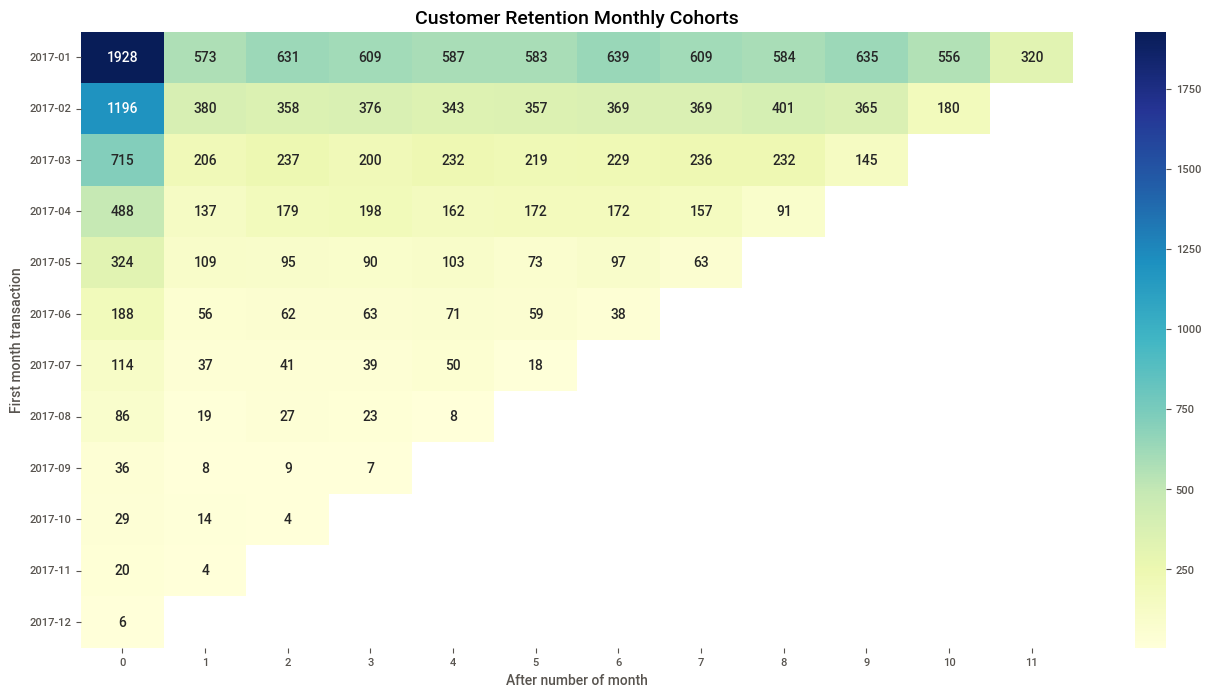

In [21]:
# Initialize the figure
plt.figure(figsize=(16, 8))

# Adding a title
plt.title('Customer Retention Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(cohort_count, annot=True, fmt= '.0f',cmap='YlGnBu')
plt.ylabel('First month transaction')
plt.xlabel('After number of month')
plt.yticks( rotation=360)
plt.show()

👉 Calculate Retention Rate:

In [22]:
# get the first month customer count:
first_customer_count = cohort_count.iloc[:,0]
first_customer_count

first_trans_year_month
2017-01    1928.0
2017-02    1196.0
2017-03     715.0
2017-04     488.0
2017-05     324.0
2017-06     188.0
2017-07     114.0
2017-08      86.0
2017-09      36.0
2017-10      29.0
2017-11      20.0
2017-12       6.0
Freq: M, Name: 0, dtype: float64

In [23]:
# Calculate to percentage
retention_rate = cohort_count.divide(first_customer_count, axis=0)

# Coverting the retention rate into percentage and Rounding off.
# retention_rate = retention_rate.round(3)*100
retention_rate

cohort_month,0,1,2,3,4,5,6,7,8,9,10,11
first_trans_year_month,,,,,,,,,,,,
2017-01,1.0,0.297199,0.327282,0.315871,0.304461,0.302386,0.331432,0.315871,0.302905,0.329357,0.288382,0.165975
2017-02,1.0,0.317726,0.299331,0.314381,0.286789,0.298495,0.308528,0.308528,0.335284,0.305184,0.150502,NaN
2017-03,1.0,0.288112,0.331469,0.279720,0.324476,0.306294,0.320280,0.330070,0.324476,0.202797,NaN,NaN
2017-04,1.0,0.280738,0.366803,0.405738,0.331967,0.352459,0.352459,0.321721,0.186475,NaN,NaN,NaN
2017-05,1.0,0.336420,0.293210,0.277778,0.317901,0.225309,0.299383,0.194444,NaN,NaN,NaN,NaN
2017-06,1.0,0.297872,0.329787,0.335106,0.377660,0.313830,0.202128,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.324561,0.359649,0.342105,0.438596,0.157895,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.220930,0.313953,0.267442,0.093023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.222222,0.250000,0.194444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


👉 Viz Retention Cohort:

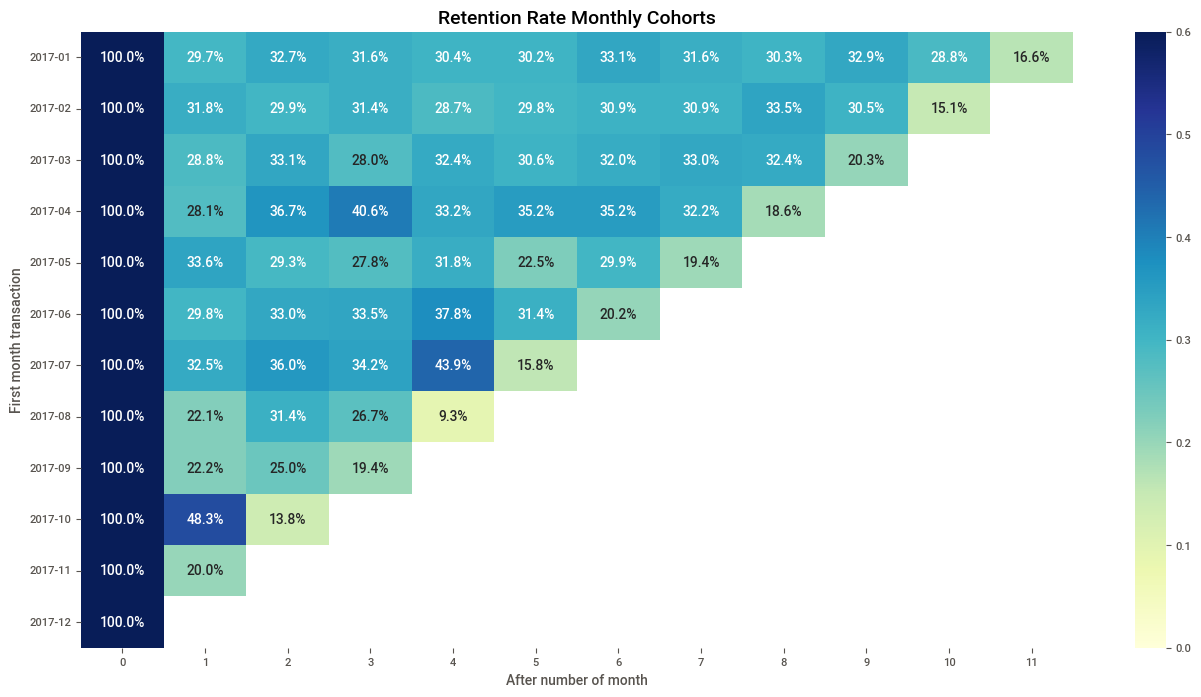

In [24]:
# Initialize the figure
plt.figure(figsize=(16, 8))

# Adding a title
plt.title('Retention Rate Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention_rate, annot=True, fmt= '.1%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('First month transaction')
plt.xlabel('After number of month')
plt.yticks( rotation=360)
plt.show()

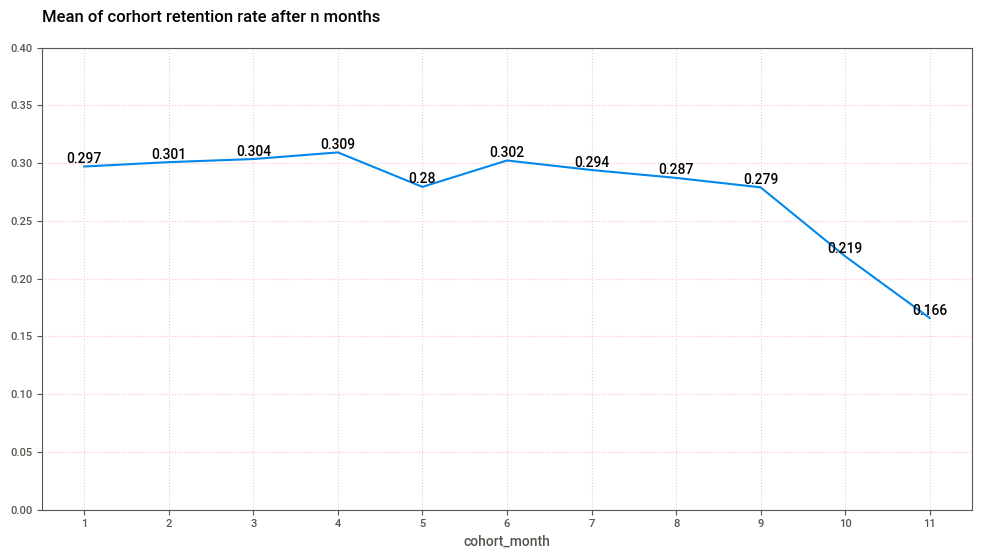

In [54]:
mean_retention_rate = retention_rate.mean(axis=0)

plt.figure(figsize=(12, 6))
sns.lineplot(mean_retention_rate[1:])
plt.xticks(range(1, len(mean_retention_rate)))
plt.grid(True, ls = ':', color = 'pink')
# plot bar label:
for i, v in enumerate( mean_retention_rate[1:], 1 ):
    plt.text(x = i, y = v + 0.003, s = str(round(v, 3)), ha = 'center')
plt.ylim(0, 0.4)
plt.title('Mean of corhort retention rate after n months\n', loc = 'left')
plt.show()

## 📖 Useful articles:


- https://medium.com/
- https://tinhte.vn/thread/nhung-gi-minh-da-hoc-de-di-lam-data-analyst.3578777/
- https://towardsdatascience.com/this-is-what-a-good-data-resume-should-have-582f7dfa40e0
- https://towardsdatascience.com/what-i-look-for-in-every-data-analyst-candidate-7d05c52bb19e
- https://pudding.cool/
- https://www.youtube.com/@statquest
